#Author: Riadul Islam Rabbi

#GRIPMAR21 : The sparks foundation (TSF)

####Data Science and Business Analytics Intern

###`Exploratory Data Analysis - Sports`



 1.Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’</br>
2. As a sports analysts, find out the most successful teams, players and factors 
contributing win or loss of a team. </br>

3. Suggest teams or players a company should endorse for its products. 


#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Loading Dataset

In [2]:
matches_data = pd.read_csv('/content/matches.csv')
deliveries_data = pd.read_csv('/content/deliveries.csv')

##Exploratory Data Analysis and Data preprocessing

####**Matches data explore**

In [3]:
matches_data.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

There are 756 rows and 18 columns.Those are 'id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'

In [5]:
matches_data.shape

(756, 18)

In [6]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Here we can see that `umpire3` column 637 missing values. It is not effect others column.We can remove this column from the dataset.

In [8]:
matches_data = matches_data.drop('umpire3', axis = 1)
matches_data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


Some rows are missing and filling these missing values using the mode() method.Because those values are categorical.

In [10]:
matches_data = matches_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
matches_data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

####Statistics Analysis

Here, id is a player indentity but it is not affect others variable. Here , `season`,`dl_applied`, `win_by_runs`,`win_by_wickets` are numerical value. `season` column mainly year which will not be counted mean, std, max and quartile.`dl_applied` is true and false value.Here, 0 means no applied dl method and 1 means dl method applied.`win_by_runs` column mean value is 13.28 , std value 23.47, max value 146. `win_by_wickets` column mean value is 3.35, std value 3.38, max value 10.

In [11]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
matches_data.describe(include='object')

,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2
count,756,756,756,756,756,756,756,756,756,756,756,756
unique,32,546,15,15,15,2,3,15,226,41,61,65
top,Mumbai,2017-04-30,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,Mumbai Indians,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi
freq,108,2,101,95,98,463,743,113,25,77,75,59


In [13]:
matches_data['city'].value_counts().to_frame()

,city
Mumbai,108
Kolkata,77
Delhi,74
Bangalore,66
Hyderabad,64
Chennai,57
Jaipur,47
Chandigarh,46
Pune,38
Durban,15


Most of the venue used Eden Gardens, then M Chinnaswamy stadium and Wankhede Stadium.

In [72]:
matches_data['venue'].value_counts().to_frame()

,venue
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,73
Feroz Shah Kotla,67
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,47
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Subrata Roy Sahara Stadium,17


Most of the match played in 2013 and less of the match played in 2009.

In [15]:
matches_data['season'].value_counts().to_frame()

,season
2013,76
2012,74
2011,73
2019,60
2018,60
2016,60
2014,60
2010,60
2017,59
2015,59


Most of the match winned Mumbai Indians , then Chennai Super Kings , Kolkata Knight Riders

In [17]:
matches_data['winner'].value_counts().to_frame()

,winner
Mumbai Indians,113
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29
Gujarat Lions,13


In [18]:
matches_data['result'].value_counts().to_frame()

,result
normal,743
tie,9
no result,4


In [19]:
matches_data['dl_applied'].value_counts().to_frame()

,dl_applied
0,737
1,19


In [20]:
matches_data['toss_winner'].value_counts().to_frame()

,toss_winner
Mumbai Indians,98
Kolkata Knight Riders,92
Chennai Super Kings,89
Kings XI Punjab,81
Royal Challengers Bangalore,81
Delhi Daredevils,80
Rajasthan Royals,80
Sunrisers Hyderabad,46
Deccan Chargers,43
Pune Warriors,20


Here, we can see that Ch Gayle winned most of the palyer of match.

In [21]:
matches_data['player_of_match'].value_counts().to_frame().head()

,player_of_match
CH Gayle,25
AB de Villiers,20
DA Warner,17
MS Dhoni,17
RG Sharma,17


In [50]:
big_margin=matches_data[(matches_data['win_by_runs']>=100) | (matches_data['win_by_wickets']>=8)]
print(big_margin.winner.value_counts())

Royal Challengers Bangalore    19
Kolkata Knight Riders          17
Mumbai Indians                 15
Delhi Daredevils               13
Rajasthan Royals               12
Chennai Super Kings            11
Kings XI Punjab                 9
Sunrisers Hyderabad             9
Deccan Chargers                 2
Kochi Tuskers Kerala            2
Rising Pune Supergiants         1
Rising Pune Supergiant          1
Name: winner, dtype: int64


###Visualization

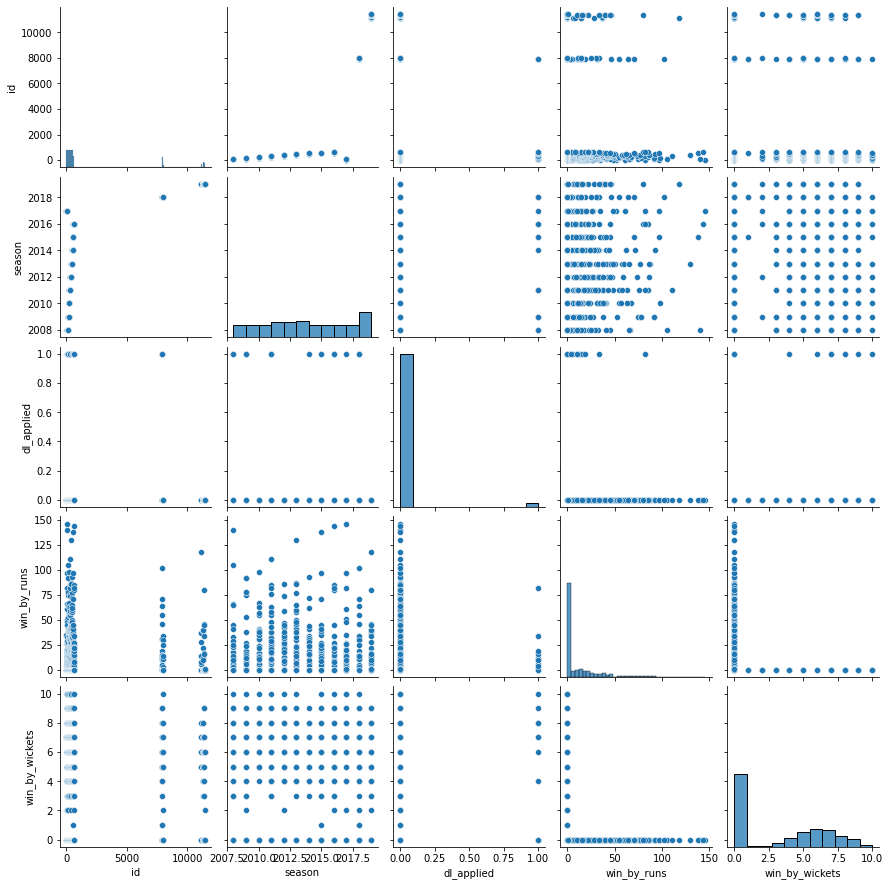

In [33]:
#plt.subplots(figsize=(20, 6))
sns.pairplot( data = matches_data)
plt.show()

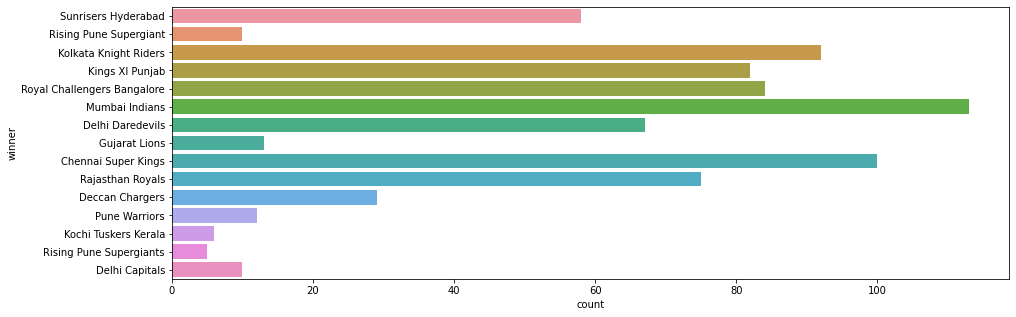

In [43]:
plt.subplots(figsize=(15,5))
sns.countplot(y="winner", data=matches_data)
plt.show()

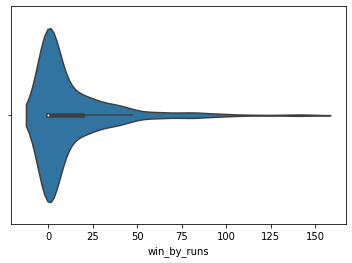

In [48]:
sns.violinplot(x = 'win_by_runs', data= matches_data)

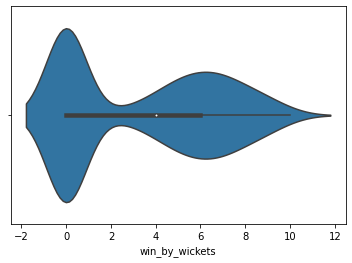

In [49]:
sns.violinplot(x = 'win_by_wickets', data = matches_data)

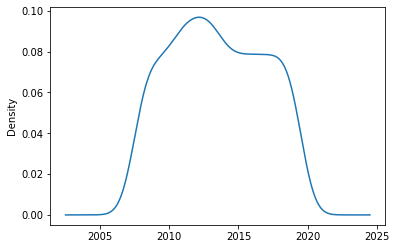

In [52]:
matches_data['season'].plot(kind="kde")
plt.show()

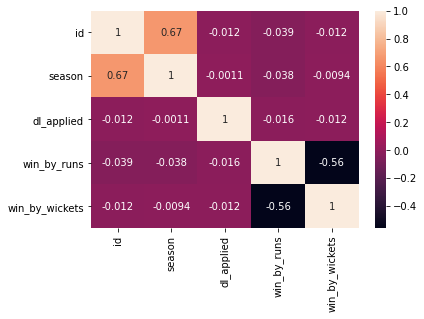

In [53]:
sns.heatmap(matches_data.corr(),annot=True)

In [74]:
matches_data['umpire1'].value_counts().to_frame().head()

,umpire1
HDPK Dharmasena,75
Asad Rauf,51
S Ravi,49
AK Chaudhary,43
Aleem Dar,38


In [75]:
matches_data['umpire2'].value_counts().to_frame().head()

,umpire2
S Ravi,59
C Shamshuddin,57
SJA Taufel,54
RJ Tucker,38
CK Nandan,36


###**Deliveries Data**

In [54]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [55]:
deliveries_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [56]:
deliveries_data.shape

(179078, 21)

In [57]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [58]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [59]:
deliveries_data = deliveries_data.drop(['player_dismissed', 'dismissal_kind', 'fielder'], axis=1)
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [60]:
deliveries_data.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [61]:
deliveries_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [62]:
deliveries_data.describe(include='object')

,batting_team,bowling_team,batsman,non_striker,bowler
count,179078,179078,179078,179078,179078
unique,15,15,516,511,405
top,Mumbai Indians,Mumbai Indians,V Kohli,SK Raina,Harbhajan Singh
freq,22619,22517,4211,4173,3451


In [63]:
deliveries_data.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.003958,0.008268,-0.001349,-0.009150,-0.007549,0.000905,-0.012429,-0.004623,-0.001475,0.033510,-0.013323,0.030727
inning,0.003958,1.000000,-0.050076,-0.003943,0.084154,0.001201,-0.000757,-0.001996,-0.000904,0.003442,-0.005362,-0.000531,-0.005485
over,0.008268,-0.050076,1.000000,-0.007424,-0.034329,-0.010003,0.012111,-0.004764,0.016984,-0.000979,0.086701,-0.002479,0.086326
ball,-0.001349,-0.003943,-0.007424,1.000000,-0.001143,-0.004665,0.006602,-0.002727,0.000567,0.000711,0.007950,-0.002576,0.007414
is_super_over,-0.009150,0.084154,-0.034329,-0.001143,1.000000,-0.001019,0.001353,0.001735,0.013640,-0.000071,0.010125,0.003504,0.010891
wide_runs,-0.007549,0.001201,-0.010003,-0.004665,-0.001019,1.000000,-0.006196,-0.015855,-0.008675,0.012817,-0.094579,0.720916,0.059077
bye_runs,0.000905,-0.000757,0.012111,0.006602,0.001353,-0.006196,1.000000,-0.004596,-0.002515,-0.000142,-0.018936,0.332352,0.051946
legbye_runs,-0.012429,-0.001996,-0.004764,-0.002727,0.001735,-0.015855,-0.004596,1.000000,-0.006434,-0.000362,-0.070106,0.554458,0.048075
noball_runs,-0.004623,-0.000904,0.016984,0.000567,0.013640,-0.008675,-0.002515,-0.006434,1.000000,-0.000198,0.004832,0.194899,0.046427
penalty_runs,-0.001475,0.003442,-0.000979,0.000711,-0.000071,0.012817,-0.000142,-0.000362,-0.000198,1.000000,-0.002591,0.057882,0.009755


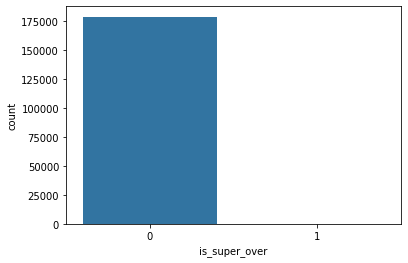

In [64]:
sns.countplot(data=deliveries_data, x = 'is_super_over')
plt.show()

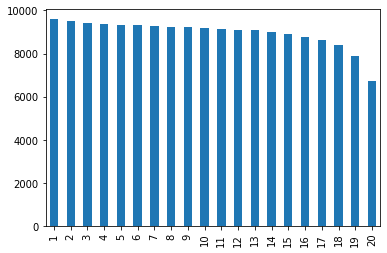

In [65]:
deliveries_data['over'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Number of total runs in Different Seasons')

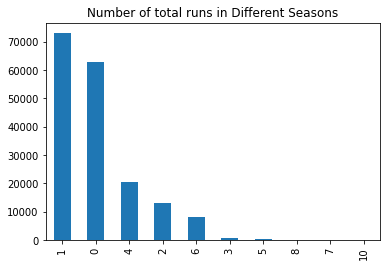

In [66]:
deliveries_data['total_runs'].value_counts().plot(kind="bar")
plt.title('Number of total runs in Different Seasons')

Text(0.5, 1.0, 'Wide Runs Scored In Matches')

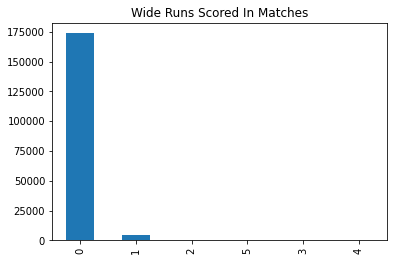

In [67]:
deliveries_data['wide_runs'].value_counts().plot(kind="bar")
plt.title("Wide Runs Scored In Matches")

In [68]:
deliveries_data.corr()['total_runs'].sort_values(ascending=False)

total_runs       1.000000
batsman_runs     0.977278
extra_runs       0.098363
over             0.086326
wide_runs        0.059077
bye_runs         0.051946
legbye_runs      0.048075
noball_runs      0.046427
match_id         0.030727
is_super_over    0.010891
penalty_runs     0.009755
ball             0.007414
inning          -0.005485
Name: total_runs, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


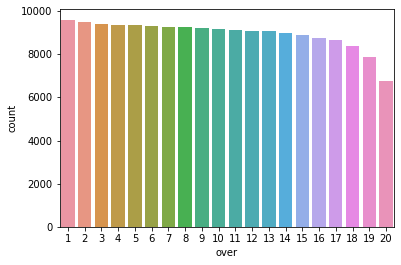

In [70]:
deliveries_data['over'].value_counts()
sns.countplot(deliveries_data['over'])

In [71]:
deliveries_data['noball_runs'].value_counts()

0    178364
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64

##Summary from matches data and deliveries data


**Matches Data summary**
1.  Most of the city used `Mumbai city`
2.  Most of the venue used `Eden Gardens`
3.  Most of the season match in `2013` 
4.  Most of the player match `C H Gayle`
5.  Most of toss win `Mumbai Indians`
6.  Most of the match winner `Mumbai Indians`



**Deliveries Data**


1.   Most of the single runs with deliveries
2.   In 20th over , finished the match.
3.   In any season super over didn't fall.
4.   



<h3>Thank You</h3>

In [ ]:
https://youtu.be/MuvhuGch1G4